**We will import the libraries we required:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # this will apply the 'ggplots' style to the matplotlib plots in the notebook.

**We will Import the creditcard.csv data for the preprocessing of the data**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Analytics Project/Capstone Project Final/data/creditcard.csv")

In [47]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


- To protect the user's identity and the security of their confidential information, the dataset provider has applied Principal Component Analysis transformation on the original numerical features and compressed it into 28 principals components.

- Only two features have not been transformed i.e. 1) Time and 2) Amount

- The feature class will be target column with user labels as:
    *   0 : non-fradulent
    *   1 : fraudulent


  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset exclusively comprises numerical features, and notably, there are no instance of missing values. Consequently, there is **no** need for **null-value handling** in this dataset.

# Exploratory Data Analysis

For the subsequent step, we will conduct fundamental **Exploratory** **Data Analysis (EDA)** on the dataset to enhance our understanding and extract valuable insights.

In [6]:
# before that we will set the default graph figsize property
plt.rcParams['figure.figsize']=[8,6]

In [7]:
Class = df['Class'].value_counts()
Class

0    284315
1       492
Name: Class, dtype: int64

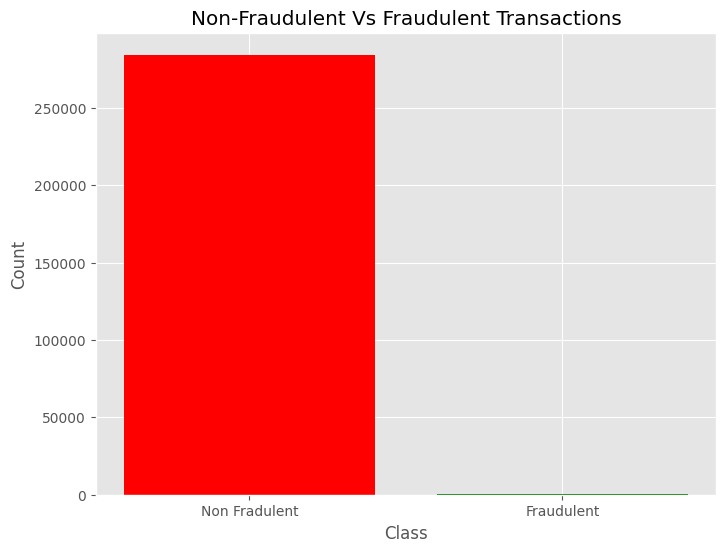

In [8]:
labels = ['Non Fradulent','Fraudulent']
plt.bar(labels, Class.values, color=['Red','Green'])
plt.title("Non-Fraudulent Vs Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- The barplot reveals a significant imbalance between classes (0-Non Fradulent) and (1-Fraudulent).

- Majority of features are in PCA form , with the exceptions being Time and Amount ,a more in-depth examination of these two features is required.

In [9]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

- The feature we are most interested in is the "Amount". Here us the summary of the feature.

In [10]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

- We will initiate the visualization of transaction counts across hours, starting with the entire dataset. Subsequently, we will partition the dataset into fraudulent and non-fradulent transactions to gain a more detailed perspective.

- Now we will check the number of occurances of each class label and we will plot the information using matplotlib.

In [11]:
non_fraud = len(df[df.Class==0])
fraud = len(df[df.Class==1])
fraud_percentage = round((fraud/ (fraud+ non_fraud)) * 100, 2)

In [12]:
print("Number of Non-Fraudulent Transactions: ",non_fraud)
print("Number of Fraudulent Transactions: ", fraud)
print("Percentage of Fraudulent Transactions: ",fraud_percentage)

Number of Non-Fraudulent Transactions:  284315
Number of Fraudulent Transactions:  492
Percentage of Fraudulent Transactions:  0.17


- We can observe that the genuine transactions are over 99%.
- We will apply scaling techniques on the "Amount" feature to transform the range of values.
- We will drop the original "Amount" column and add a new column with the scaled values. We will also drop the "Time" columns as it is irrelevant.




In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [14]:
df.drop(columns=['Amount','Time'], inplace=True ,axis=1)

Y = df['Class']
X = df.drop(['Class'], axis=1)

- Now, we will split the credit card data with a split of 70-30 using train_test_split().
- train_test_split() function in scikit-learn is a useful utility for splitting a dataset into training and testing sets.

- Parameters
- X: Feature matrix
- Y: Target variable
- test_size: Proportion of the dataset to include in the test split. Here we have set the test_size as 0.3 means 30% of the data we take as testing data set.
- random_state: we have set the seed for random number generation, to ensure the reproducibility

In [15]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X,Y, test_size=0.3, random_state=42)


In [16]:
print("Shape of the training dataset train_X: ", train_X.shape)
print("Shape of the testing dataset test_X: ", test_X.shape)

Shape of the training dataset train_X:  (199364, 29)
Shape of the testing dataset test_X:  (85443, 29)


**Applying Machine Learning Algorithm to Credit Card Dataset**

- We will explore various machine learning algorithms to determine the most effective model for our binary classification problem.

- The task involves predicting one of the two class labels. We plan to access the performance of different algorithms, such as Random Forest and Decision Tree identify the most suitable solution for our specific problem

- Our approach involves constructing Random Forest and Decision Tree classifiers to identify the most effective model.

**Decision Tree Algorithm**

- The Decision Tree Algorithm is a supervised machine learning technique employed for both classification and regression tasks. Its objective is to create a training model capables of predicting the value of a target class variable.
- This is achieved by learning straighforward if-then-else decision rules derived from the patterns present in the training data.

**Random Forest Algorithm**

- Random Forest is supervised Machine Learning algorithm. It creates a "forest" out of an ensemble of "decision trees", which are normally trained using the  "bagging" technique.

- The bagging method's basic principal is that combining different learning models improved the outcome.To get a more precise and reliable forecast, random forest creates several decision trees and merges them.

**Training and Evaluation of models on the dataset**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

- Here we are creating a **RandomForestClassifier** with 100trees in the forest.
- The large number of trees will generally lead to better performance, but it may also increase the training time.

In [19]:
# Decision Tree Classifier
decision_tree.fit(train_X, train_Y)
predictions_data = decision_tree.predict(test_X)

- Now we will check the score of the Decision Tree model

In [20]:

decision_tree_score = decision_tree.score(test_X, test_Y) * 100

# Printing the score of the classifier
print("Decision Tree Score is: ", decision_tree_score)

Decision Tree Score is:  99.91807403766254


In [21]:
# Random Forest
random_forest.fit(train_X, train_Y)
predictions_data_rf = random_forest.predict(test_X)

In [22]:
random_forest_score = random_forest.score(test_X, test_Y) * 100

# Printing the score of the Random Forest Classifiers
print("Random Forest Score is: ", random_forest_score)

Random Forest Score is:  99.96254813150287


In [23]:
# Printing the scores of the both classifiers
print("Decision Tree: ", round((decision_tree_score),4))
print("Random Forest: ", round((random_forest_score),4))

Decision Tree:  99.9181
Random Forest:  99.9625


- The Random Forest classifier has slightly an edge over the Decision Tree Classifier.


**Evaluation Metrics**

- We will create a function to print the metrics:

1.   Accuracy_score
2.   Precision_score
3.   Confusion_matrix
4.   Recall_score
5.   F-1 score

In [24]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

**Evaluation of Decision Tree Model**

In [25]:
print("Evaluation of Decision Tree Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data),4))
print("Precision:",round(precision_score(test_Y,predictions_data),4))
print("recall_score:",round(recall_score(test_Y,predictions_data),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data),4))

Evaluation of Decision Tree Model: 
Accuracy: 0.9992
Precision: 0.7062
recall_score: 0.8309
F1-Score: 0.7635


**Evaluation metrics and Confusion Matrix for Decision Tree**


In [26]:
print("Evaluation of Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data_rf),4))
print("Precision:",round(precision_score(test_Y,predictions_data_rf),4))
print("recall_score:",round(recall_score(test_Y,predictions_data_rf),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data_rf),4))

Evaluation of Random Forest Model: 
Accuracy: 0.9996
Precision: 0.9561
recall_score: 0.8015
F1-Score: 0.872


In [27]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_data.round())
print("   CM   -  DT") # CM = Confusion matrix and DT = Decision tree
print(confusion_matrix_dt)

   CM   -  DT
[[85260    47]
 [   23   113]]


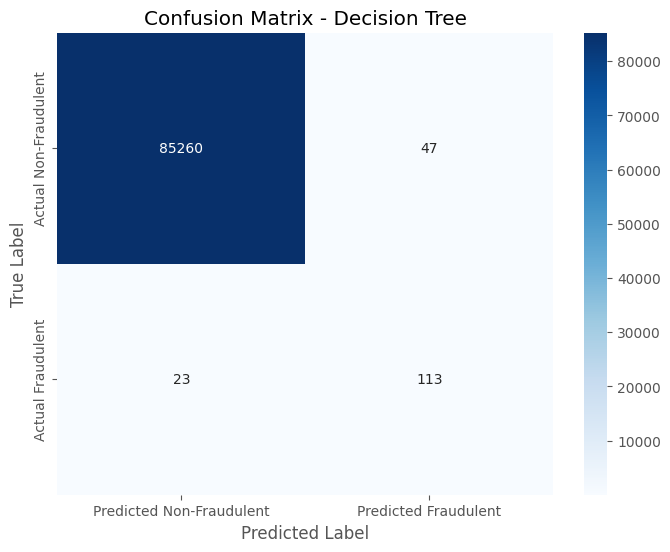

In [28]:
# we will plot the confusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_dt, annot=True , fmt='d' , cmap="Blues",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

We understand from the confusion matrix:

- Non-Fraudulent transactions:


1.   Correctly predicted as non-fraudulent(True Negative) 85260 transactions.
2.   Incorrectly predicted as fraudulent(False Positive) 47 transactions.

- Fraudulent Transactions:
1.  Incorrectly predicted as non-fraudulent(False Negative) : 23 transactions
2.  Correctly predicted as fraudulent(True Positive) : 113 transactions



In-short summary:
- The model correctly identified 113 fraudulent transactions.
- It incorrectly identified 23 transactions as non-fraudulent.
- It correctly identified 85260 non-fraudulent transactions.
- It incorrectly identified 47 non-fraudulent transactions as fraudulent.

**Evaluation Metrics and Confusion Matrix of Random Forest model**

In [29]:
# Confusion Matrix
confusion_matrix_rf = confusion_matrix(test_Y,predictions_data_rf.round())
print("   CM   -  RF") # CM = Confusion matrix and RF = RandomForest
print(confusion_matrix_rf)

   CM   -  RF
[[85302     5]
 [   27   109]]


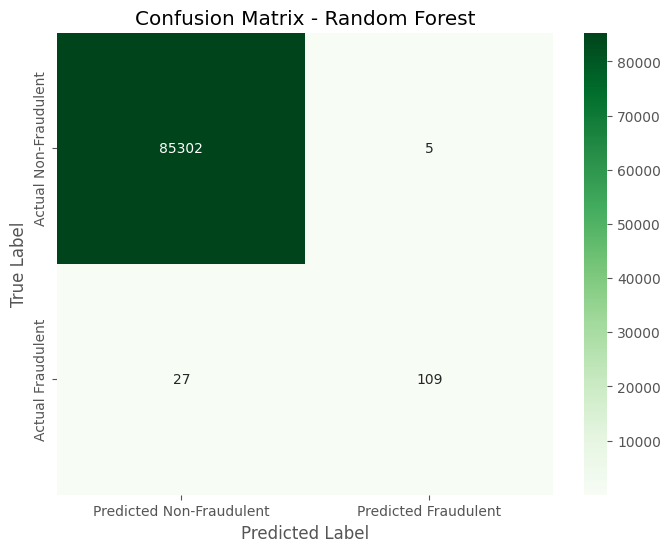

In [46]:
# we will plot the consfusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf, annot=True , fmt='d' , cmap="Greens",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

We understand from the confusion matrix:

- Non-Fraudulent transactions:


1.   Correctly predicted as non-fraudulent(True Negative) 85302 transactions.
2.   Incorrectly predicted as fraudulent(False Positive) 5 transactions.

- Fraudulent Transactions:
1.  Incorrectly predicted as non-fraudulent(False Negative) : 27 transactions
2.  Correctly predicted as fraudulent(True Positive) : 109 transactions



In-short summary:
- The model correctly identified 109 fraudulent transactions.
- It incorrectly identified 27 transactions as non-fraudulent.
- It correctly identified 85302 non-fraudulent transactions.
- It incorrectly identified only 5 non-fraudulent transactions as fraudulent.

Class-Imbalance

- The Random Forest model works better than Decision Trees. In the presenece of a class-Imbalance issue, where genuine transactions account for over 99% of the dataset and credit card fraud transactions constitute only 0.17%.

- Training the model without addressing the imbalance can lead to biased predictions.

- Despite the apparent accuracy, such a model may not effectively capture the nuances of the minority class (fraud transactions) and may not generalize well to real-world situations.

- The class imbalance problem can be solved by various techniques. Oversampling is one of them.

In [31]:
# we will use the SMOT (Synthetic Minority Oversampling Technique, or SMOTE)
# It is the method of data augumentation for the minority class.

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X,Y)

print("Resampled shape of X: ",X_resampled.shape)
print("Resampled shape of Y: ",Y_resampled.shape)


Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)


In [32]:
from collections import Counter
value_counts = Counter(Y_resampled)
print(value_counts)

Counter({0: 284315, 1: 284315})


In [33]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [34]:
rf_resampled = RandomForestClassifier(n_estimators=100)
rf_resampled.fit(train_X, train_Y)

RandomForestClassifier()

- Given that the Random Forest Algorithm outperformed the Decision Tree Algorithm, we will now apply the Random Forest algorithm to our resampled data.

In [35]:
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [36]:
print(random_forest_score_resampled)

99.99003452743142


**Evaluation Metrics and Confusion matrix**

In [37]:
# Confusion Matrix
confusion_matrix_rf_resampled= confusion_matrix(test_Y,predictions_resampled.round())
print("   CM   -  RF") # CM = Confusion matrix and RF = RandomForest
print(confusion_matrix_rf_resampled)

   CM   -  RF
[[85132    17]
 [    0 85440]]


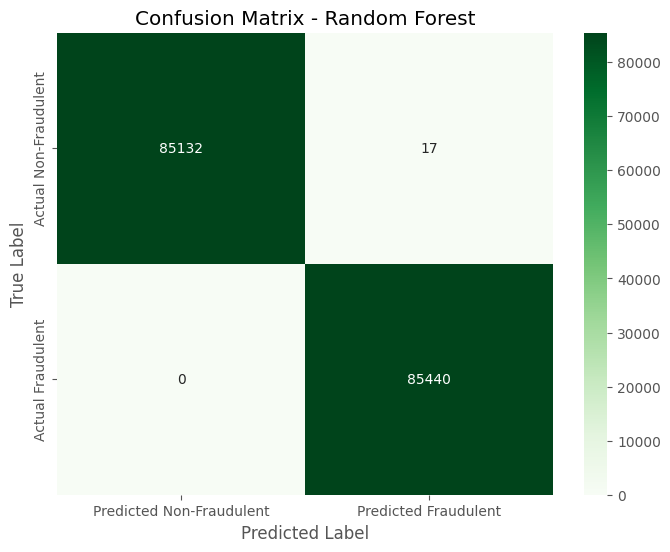

In [45]:
# Confusion Matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf_resampled, annot=True , fmt='d' , cmap="Greens",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



We understand from the confusion matrix:

- Non-Fraudulent transactions:

Correctly predicted as non-fraudulent(True Negative) 85131 transactions.
    
Incorrectly predicted as fraudulent(False Positive) 17 transactions.

- Fraudulent Transactions:

Incorrectly predicted as non-fraudulent(False Negative) : 0 transactions

Correctly predicted as fraudulent(True Positive) : 85440 transactions



We understand from the confusion Matrix is:
- The model correctly identified 85440 fraudulent transactions.
- It incorrectly identified 0 transactions as non-fraudulent.
- It correctly identified 85131 non-fraudulent transactions.
- It incorrectly identified only 17 non-fraudulent transactions as fraudulent.

In [39]:
print("Evaluation of Resampled Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_resampled),4))
print("Precision:",round(precision_score(test_Y,predictions_resampled),4))
print("recall_score:",round(recall_score(test_Y,predictions_resampled),4))
print("F1-Score:",round(f1_score(test_Y,predictions_resampled),4))

Evaluation of Resampled Random Forest Model: 
Accuracy: 0.9999
Precision: 0.9998
recall_score: 1.0
F1-Score: 0.9999


We can see that our model performed much better than the previous Random Forest classifier without oversampling.

We have applied the techniques to address the class imbalance issues and achieved an accuracy of more than 99%.

- We will import the pickle to dump the dataframe and the model for the model deployement as the future scope.

In [40]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_resampled,open('rf_resampled.pkl','wb'))